In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, HuberRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_digits, load_iris, load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Logistic Regression

Used for binary classification

- Utilises the logit function (aka sigmoid function): $ y = \frac{1}{1 + e^{-x}} $
    - `y = target value`
    - `e = Euler's number (2.71828...) -> base of natural logarithm`
    - `x = arguments` <br><br>
- Passes linear function into sigmoid function: $y = \frac{1}{1 + e^{-(m*x + b)}} $

## Cost Function

We learned about the cost function J(θ) in the Linear regression, the cost function represents optimization objective i.e. we create a cost function and minimize it so that we can develop an accurate model with minimum error.

If we try to use the cost function of the linear regression in ‘Logistic Regression’ then it would be of no use as it would end up being a **non-convex** function with **many local minimums**, in which it would be very difficult to minimize the cost value and find the global minimum.

Instead, our cost function for logistic regression looks like:

\begin{align*}
J(\boldsymbol{\theta}) & = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)}),y^{(i)}) \newline
& = \dfrac{1}{m} \sum_{i=1}^m \left[-y^{(i)} \log(h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)})) -(1-y^{(i)}) \log(1-h_{\boldsymbol{\theta}}(\mathbf{x}^{(i)}))\right]
\end{align*}

The cost can be written as:

\begin{align*}
& \mathrm{Cost}(h_{\boldsymbol{\theta}}(\mathbf{x}),y) = -\log(h_{\boldsymbol{\theta}}(\mathbf{x})) \; & \text{if y = 1} \newline 
& \mathrm{Cost}(h_{\boldsymbol{\theta}}(\mathbf{x}),y) = -\log(1-h_{\boldsymbol{\theta}}(\mathbf{x})) \; & \text{if y = 0}
\end{align*}

In [2]:
path = os.path.join("data_for_ilsturation", "logistic_regression_data.csv")
# loading the data
df = pd.read_csv(path)
# display some of the numeric data
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


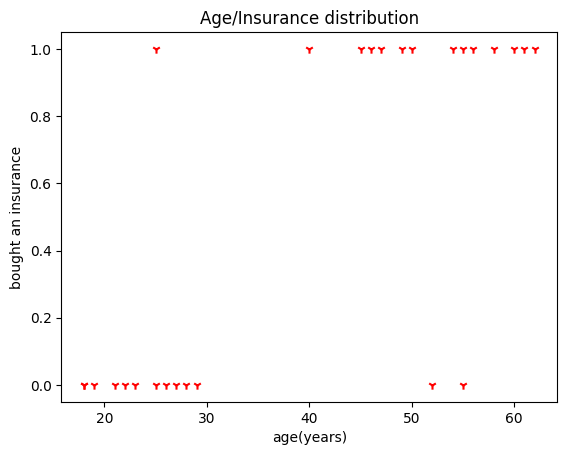

In [3]:
# explore data visually
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")

In [4]:
# splitting Data into Training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size = 0.9)

In [5]:
# initializing the model
model = LogisticRegression()
# pass data and train the model
model.fit(X_train, y_train)
# get prediction accuracy
model.score(X_test, y_test)

1.0

In [6]:
# shape = Customer-ID, age
print("Customer data yet unpredicted:\n", X_test, "\n")
# predict values for unknown data
print("Prediction:", model.predict(X_test), "\n")
# display probability for predicted value
print("Probability for given predictions:\n", model.predict_proba(X_test))

Customer data yet unpredicted:
     age
4    46
0    22
20   21 

Prediction: [1 0 0] 

Probability for given predictions:
 [[0.29374081 0.70625919]
 [0.89481632 0.10518368]
 [0.90607866 0.09392134]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


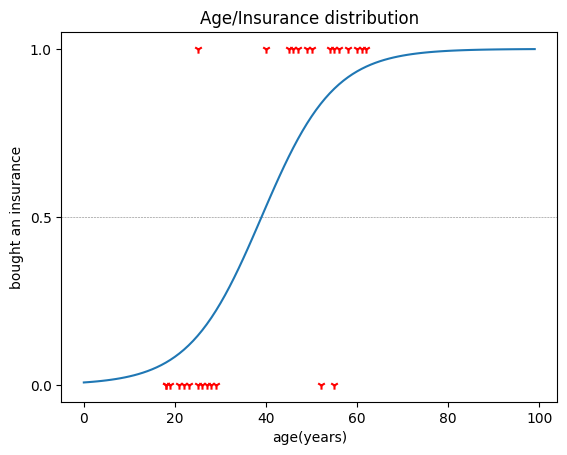

In [7]:
# Display the models internal sigmoid function together with data points
plt.yticks([0.0, 0.5, 1.0])  
plt.axhline(y=0.5, color='grey', linestyle='--', lw = 0.4)
plt.xlabel("age(years)")
plt.ylabel("bought an insurance")
plt.title("Age/Insurance distribution")
plt.scatter(df.age, df.bought_insurance, marker="1", color= "red")
plt.plot(
    # x values
    np.arange(0, 100, 1), 
    # using the models prediction on every age from 0 to 100 to plot the internal sigmoid function
    [y[1] for y in model.predict_proba(np.arange(0,100,1).reshape(100,1))]
    )

### Logistic Regression on IRIS

In [8]:
# import data
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [114]:
# we will modify the class labels as virginica and non virginica
# X = iris["data"][:, 3:]                # petal width
# y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

shuffle_index = np.random.permutation(len(iris["data"]))

X = iris["data"][:, 3:][shuffle_index][ : -30]  # petal length, petal width
y = (iris["target"] == 2).astype(int)[shuffle_index][ : -30]

X_test = iris["data"][:, 3:][shuffle_index][-30 :]
y_test = (iris["target"] == 2).astype(int)[shuffle_index][-30 : ]

In [115]:
# fitting the model to the data
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

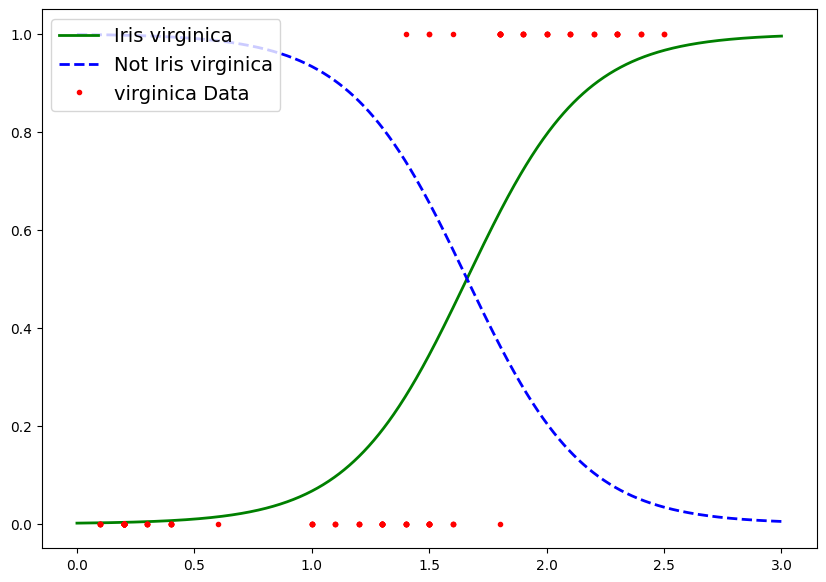

In [116]:
# plotting the fitting line
plt.figure(figsize=(10,7))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.plot(X, y, 'r.', label="virginica Data")
plt.legend(loc="upper left", fontsize=14)
plt.show()

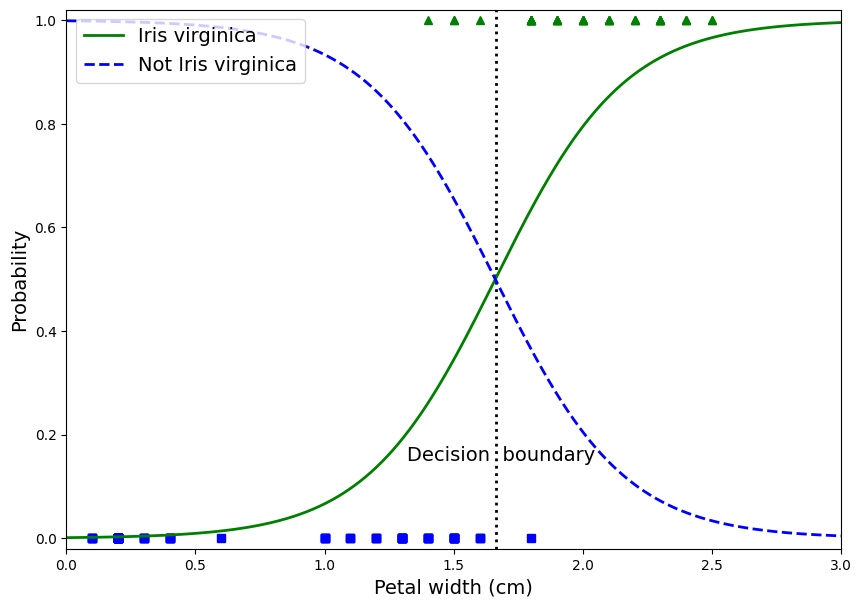

In [117]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10,7))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")


plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [64]:
print(f'the decision_boundary for classification is {decision_boundary[0]}')

print(f'the points after decision_boundary are classified as {log_reg.predict([[1.7]])[0]}')

the decision_boundary for classification is 1.6606606606606606
the points after decision_boundary are classified as 1


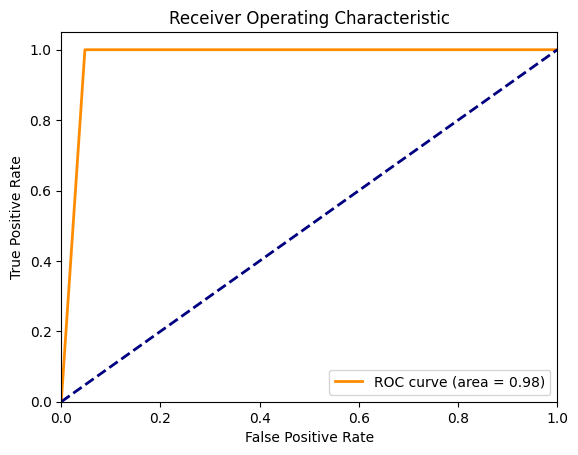

In [122]:
from sklearn.metrics import roc_curve, auc

y_true = y_test
y_scores = log_reg.predict(X_test)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [123]:
# printing the classification report
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_scores)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



Text(95.72222222222221, 0.5, 'Truth')

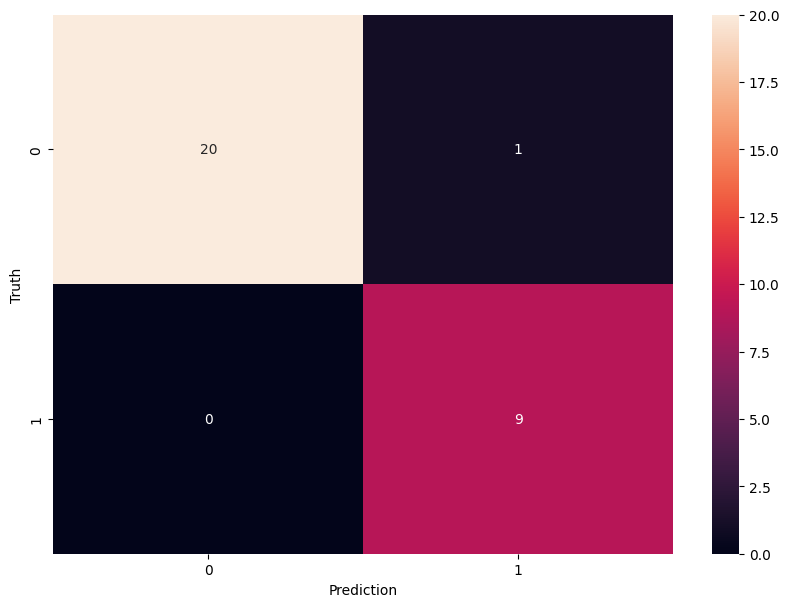

In [124]:
# plotting confusion matrix
cm = confusion_matrix(y_test, y_scores)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

## Softmax Regression

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

Where:
- $\sigma\left(\mathbf{s}(\mathbf{x})\right)_k$ is the probability of the input sample x belonging to class k.
- ${\exp\left(s_j(\mathbf{x})\right)}$ is the linear parameters of model multiplied by x.
- x is the input sample.
- K is the number of classes.

Now we will approach the classification of data when we have more than two categories. Instead of $y = \{0,1\}$ we will expand our definition so that $y = \{1,2,...C\}$.

Since $y = \{1,2,...C\}$, we divide our problem into $C$ binary classification problems; in each one, we predict the probability that 'y' is a member of one of our classes.

\begin{align*}
& y \in \lbrace1, 2 ... C\rbrace \newline
& h_{\boldsymbol{\theta}}^{(1)}(\mathbf{x}) = p(y = 1 | \mathbf{x} ; \boldsymbol{\theta}^{(1)}) \newline
& h_{\boldsymbol{\theta}}^{(2)}(\mathbf{x}) = p(y = 2 | \mathbf{x} ; \boldsymbol{\theta}^{(2)}) \newline
& \cdots \newline& h_{\boldsymbol{\theta}}^{(C)}(\mathbf{x}) = p(y =  C| \mathbf{x} ; \boldsymbol{\theta}^{(C)}) \newline
& \mathrm{prediction} = \max_{c \in \{1,2,...C\}}( h_{\boldsymbol{\theta}} ^{(c)}(\mathbf{x}) )\newline
\end{align*}

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.


In [128]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

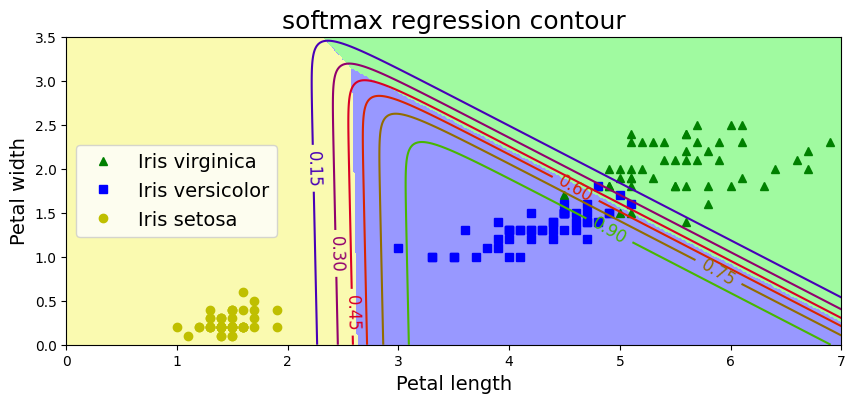

In [129]:
# plotting the fitting data contours
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title('softmax regression contour' ,fontsize= 18)
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

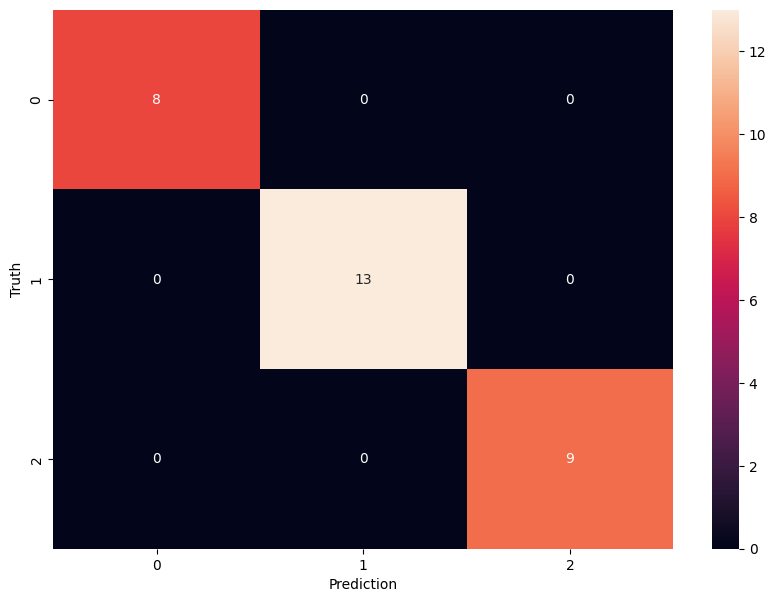

In [130]:
# plotting confusion matrix
shuffle_index = np.random.permutation(len(iris["data"]))

X = iris["data"][shuffle_index][ : -30]  # petal length, petal width
y = iris["target"][shuffle_index][ : -30]

X_test = iris["data"][shuffle_index][-30 :]
y_test = iris["target"][shuffle_index][-30 : ]

softmax_reg = LogisticRegression(multi_class="multinomial", C=10, max_iter=700)
softmax_reg.fit(X, y)

predictions = softmax_reg.predict(X_test)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [131]:
# printing the classification report
from sklearn.metrics import classification_report

cr = classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

